In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

imagen = cv.imread("/Users/danielavalencia/Desktop/Procesamiento de Imágenes/CGMWUNU5JJLCLMFIVVAWFB4YBY.jpg", 0)

COPIAS DE IMAGEN PARA NO EDITAR LA ORIGINAL
---------------------------------------------------------------------------------------------------------------------

In [2]:
img2= imagen.copy()
img3= imagen.copy()
img4= imagen.copy()
img5= imagen.copy()
img6= imagen.copy()
img7= imagen.copy()

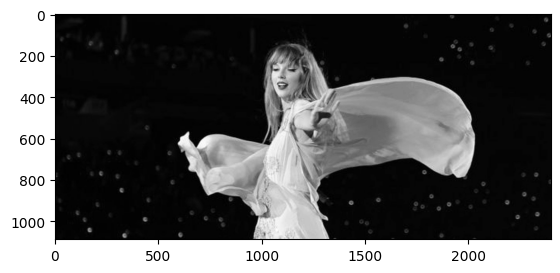

In [3]:
plt.imshow(imagen, cmap ="gray")

VECINDAD PIXELES

In [5]:
matriz = np.array(((0,1,0),
                   (0,1,0),
                   (0,0,1)))

VECINDAD 4
---------------------------------------------------------------------------------------------------------------------

In [10]:
vecindad4 = -1
for i in range (-1,1,1):
    if matriz[1+i, 1]== 1:
        vecindad4+=1
    if matriz[1,1+i]==1:
        vecindad4+=1

In [11]:
print (vecindad4)

2



VECINDAD 8
---------------------------------------------------------------------------------------------------------------------



In [12]:
vecindad8 = -1
for i in range(-1,1,1):
    for j in range(-1,1,1):
        if matriz [1+i,1+j]== 1:
            vecindad8+=1
            
vecindad8

1

ADYACENCIA
---------------------------------------------------------------------------------------------------------------------
 COMPARTEN FRONTERAS O ESQUINAS

CONECTIVIDAD
---------------------------------------------------------------------------------------------------------------------
ENTRE P Y Q (si se encuentra en el conjunto v)
- conectividad 4 : q pertenece a n(4)P
- conectividad 8 : q pertenece a n(8)P
- conectividad MIXTA : 
    Si es de la 4 vecindad 
    - Si es de la D-vecindad y N4(p) no comparte elementos con N4(q)
  

UMBRALIZACION
---------------------------------------------------------------------------------------------------------------------


Cambia una imagen de escala de grises o color a una imagen binaria
 Los píxeles que cumplen la condición se asignan a un valor binario (generalmente 255, blanco), mientras que los que no la cumplen se asignan a otro valor binario (generalmente 0, negro).

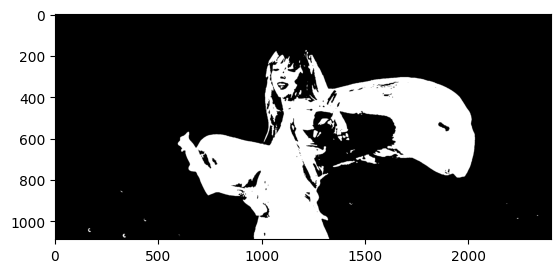

In [13]:
def umbralizacion(imagen,k):
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            if imagen[i,j] < k:
                imagen[i,j]=0
            else: 
                imagen[i,j]=255
                
umbralizacion(img2,128)
plt.imshow(img2,cmap="gray")
            

THRESHOLD
---------------------------------------------------------------------------------------------------------------------

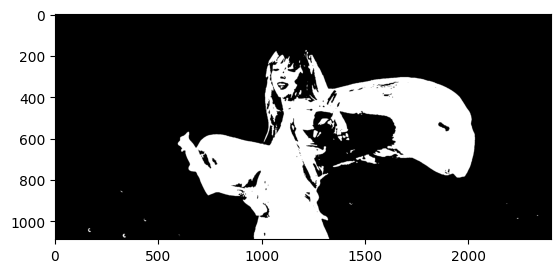

In [14]:
img_bin = cv.threshold(img2,90,255, cv.THRESH_BINARY)[1]
plt.imshow(img_bin,cmap="gray")

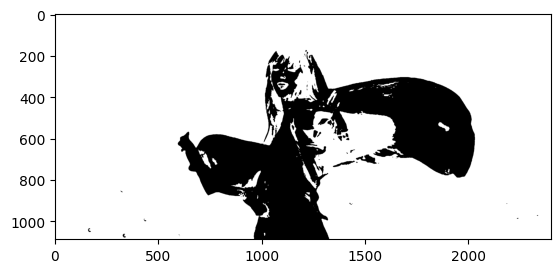

In [16]:
img_bin2= cv.threshold(img2,90,255,cv.THRESH_BINARY_INV)[1]
plt.imshow(img_bin2,cmap="gray")

NEGATIVOS DE UNA IMAGEN
---------------------------------------------------------------------------------------------------------------------
S = 255-r

Manera 1: pixel a pixel
-----------------------------------------------------------------------


In [17]:
def negativo(imagen):
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            imagen[i,j]= 255-imagen[i,j]

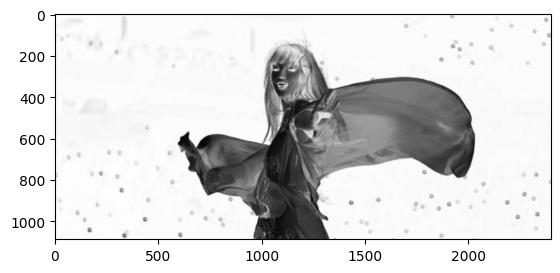

In [18]:
negativo(img3)
plt.imshow(img3, cmap="gray")

MANERA 2: OPERACION MATRICIAL
---------------------------------------------------------------------------------------------------------------------

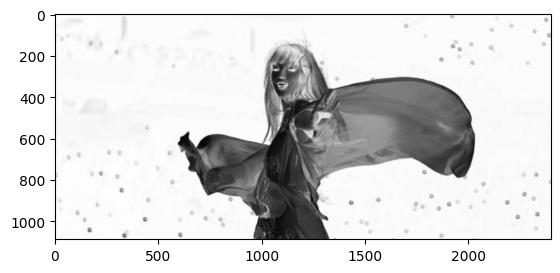

In [19]:
plt.imshow(255-imagen, cmap="gray")

MANERA 3 BITWISE_NOT
---------------------------------------------------------------------------------------------------------------------

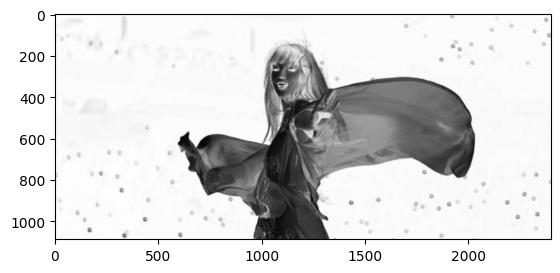

In [20]:
plt.imshow(cv.bitwise_not(imagen), "gray")

TRANSFORMACION LOGARITMICA
---------------------------------------------------------------------------------------------------------------------

 expandir el rango de intensidad de una imagen.

S= c log(1+r)

c = 255/(log(1+m))

m = pixel más grande



PIXEL A PIXEL
---------------------------------------------------------------------------------------------------------------------

In [21]:
def logaritmica(imagen):
    C = 255/np.log(1+imagen.max())
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            imagen[i,j]= C*np.log(1+imagen[i,j])
            

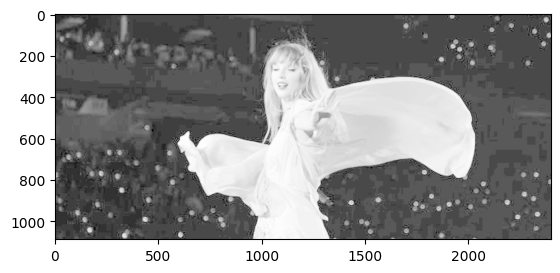

In [22]:
logaritmica (img4)
plt.imshow(img4, cmap="gray")

OPERACION MATRICIAL
---------------------------------------------------------------------------------------------------------------------

In [23]:
c= 255/np.log(1+imagen.max())

/var/folders/gm/5bh3026n7y14z50vy41xz6880000gp/T/ipykernel_2637/3717879947.py:1: RuntimeWarning: divide by zero encountered in log
  img_log = c*np.log(1+imagen)


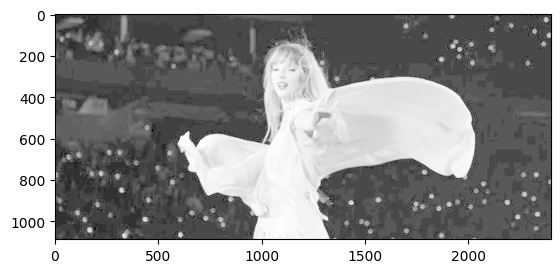

In [24]:
img_log = c*np.log(1+imagen)
plt.imshow(img_log, "gray")

TRANSFORMACION GAMMA
---------------------------------------------------------------------------------------------------------------------


S= f(x,y)^y

PIXEL A PIXEL
---------------------------------------------------------------------------------------------------------------------

In [25]:
def gamma(imagen,y):
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            imagen[i,j] = imagen[i,j]**y

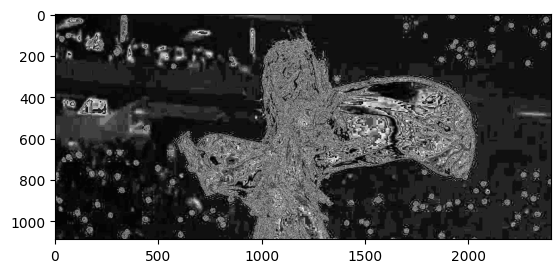

In [26]:
gamma(img5,2)
plt.imshow(img5, cmap= "gray")

.power(base,potencia)
--------------------------------------

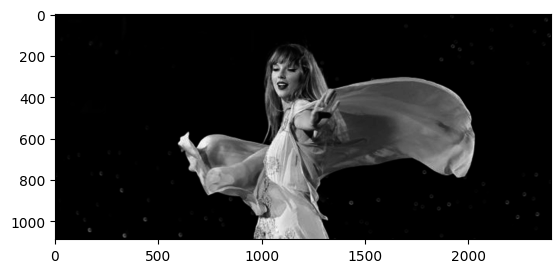

In [27]:
plt.imshow(np.power(imagen.astype(np.float32),2), cmap = "gray")

con y = 1/t (la mejor)
--------------------------------------
t < 1 oscurece la imagen

t > 1 aclara la imagen

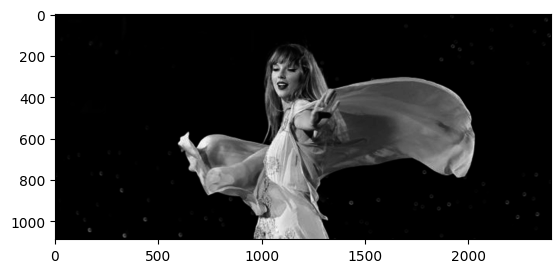

In [30]:
plt.imshow(np.power(imagen.astype(np.float64), (1/0.5)), "gray")